In [1]:
# 1. https://github.com/huggingface/diffusers
# 일단 기본이 되는 diffuser가 설치하고
# 관련 부분에 대해서 되는지 체크

# 2. 그 여러가지 중에서...
# 그 안에 있는 https://github.com/huggingface/diffusers/tree/main/examples/instruct_pix2pix

# 참고 : orgin
# https://github.com/timothybrooks/instruct-pix2pix

# L4정도에서도 가능은 해보임
# 일단 기존 batch 정도에서는 18G 정도
# GPU를 사용을 하기에...


## 환경설정

In [2]:
# !pip install torch==2.5.0 # torch 버전 확인.
# !pip install --upgrade diffusers[torch]
# !pip install --upgrade diffusers[flax]
# !pip install --upgrade diffusers transformers

!pip install diffusers[torch]
!pip install diffusers[flax]
!pip install --upgrade diffusers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.8 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.3
    Uninstalling diffusers-0.30.3:
      Successfully uninstalled diffusers-0.30.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [ ]:
# 캐시 비우기
from transformers.utils import move_cache
move_cache()

0it [00:00, ?it/s]

## 모델 다운, 테스트

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

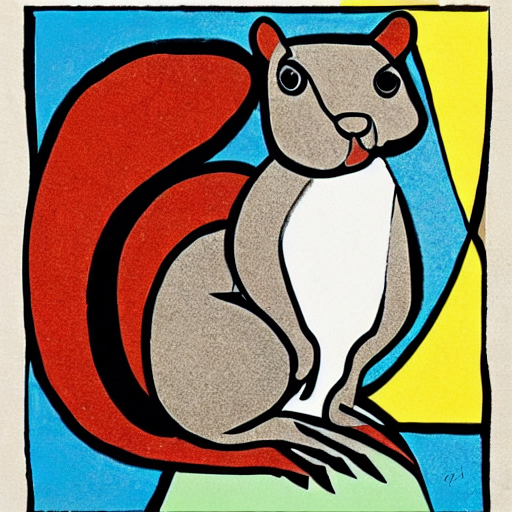

In [ ]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipeline.to("cuda")
pipeline("An image of a squirrel in Picasso style").images[0]

In [7]:
from diffusers import DDPMScheduler, UNet2DModel
from PIL import Image, ImageOps
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [8]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline

In [ ]:
#model_id = "sayakpaul/instruct-pix2pix" # <- replace this
# model_id ="runwayml/stable-diffusion-v1-5" #error
model_id ="timbrooks/instruct-pix2pix" # orgin

pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
generator = torch.Generator("cuda").manual_seed(0)

url = "https://huggingface.co/datasets/sayakpaul/sample-datasets/resolve/main/test_pix2pix_4.png"



model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:

def process_image_with_padding(file_path):
    # 이미지 열기
    image = Image.open(file_path)
    image = ImageOps.exif_transpose(image)  # 방향 정보 보정
    image = image.convert("RGB")            # RGB로 변환

    # 1:1 비율로 여백 추가
    image = ImageOps.pad(image, (512, 512), color=(255, 255, 255))  # 흰색 배경 추가

    return image
image = process_image_with_padding('go000015_KimJungeun.jpg')
image

NameError: name 'Image' is not defined

In [ ]:

prompt = "Korean instrument Janggu Drum change to Timpani"
num_inference_steps = 30
image_guidance_scale = 1.5
guidance_scale = 10
edited_image = pipe(prompt, image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]
edited_image


In [ ]:
def download_image(url):
   image = PIL.Image.open(requests.get(url, stream=True).raw)
   image = PIL.ImageOps.exif_transpose(image)
   image = image.convert("RGB")
   return image


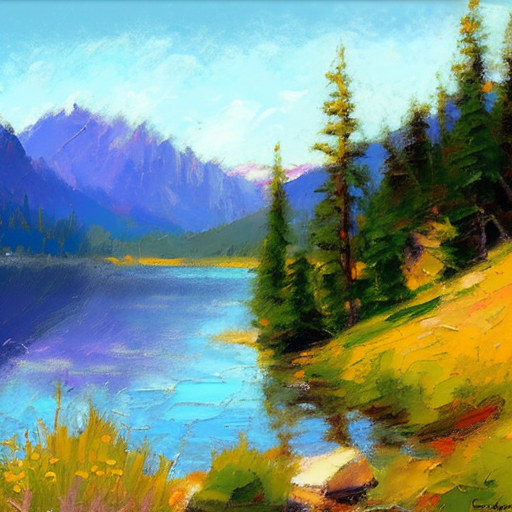

In [ ]:
image = download_image(url)
image

In [ ]:
prompt = "wipe out the lake"
num_inference_steps = 30
image_guidance_scale = 1.5
guidance_scale = 10

  0%|          | 0/30 [00:00<?, ?it/s]

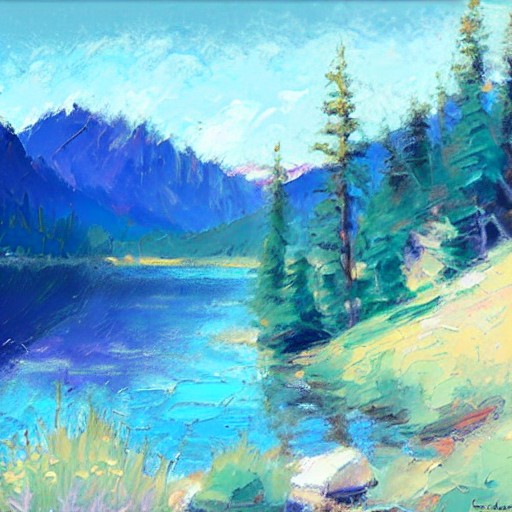

In [ ]:
edited_image = pipe(prompt, image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]
edited_image

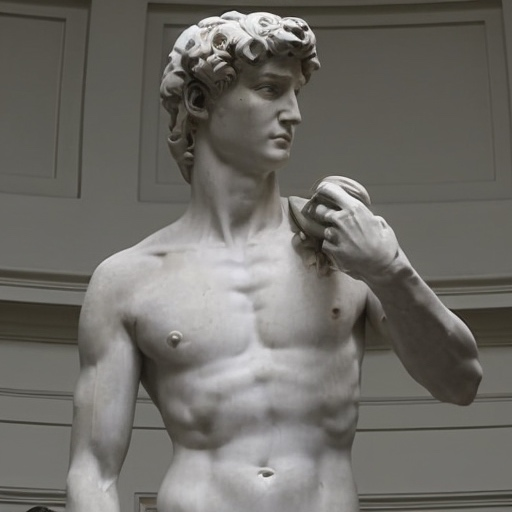

In [ ]:
url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"
image = download_image(url)
image

  0%|          | 0/30 [00:00<?, ?it/s]

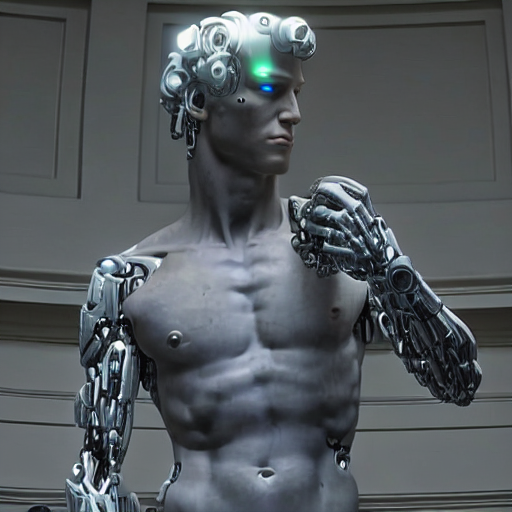

In [ ]:
prompt = "turn him into cyborg"
num_inference_steps = 30
image_guidance_scale = 1.2
guidance_scale = 10
edited_image = pipe(prompt, image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]
edited_image

In [6]:
# 형성이 안 될 때의 값을 위해서..
# https://github.com/CompVis/stable-diffusion/issues/239
pipe.safety_checker = None
pipe.requires_safety_checker = False

NameError: name 'pipe' is not defined

In [ ]:
prompt = "he wear a police cap"
num_inference_steps = 100
image_guidance_scale = 1.2
guidance_scale = 5
edited_image = pipe(prompt, image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]
edited_image

In [ ]:
prompt = "change gogh style"
num_inference_steps = 100
image_guidance_scale = 1.2
guidance_scale = 5
edited_image = pipe(prompt, image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]
edited_image

In [ ]:
prompt = "change the Claude Monet style"
num_inference_steps = 100
image_guidance_scale = 1.2
guidance_scale = 5
edited_image = pipe(prompt, image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]
# edited_image.save("edited_image.png")
edited_image

In [ ]:
# Food
url = "https://src.hidoc.co.kr/image/lib/2020/11/9/1604911318873_0.jpg"
image = download_image(url)
image

In [ ]:
prompt = "remove on the table"
num_inference_steps = 100
image_guidance_scale = 1.5
guidance_scale = 15
edited_image = pipe(prompt, image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]
edited_image

In [ ]:
prompt = "change gogh style"
num_inference_steps = 50
image_guidance_scale = 1.5
guidance_scale = 10
edited_image = pipe(prompt, image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]
edited_image

## 환경설정, 필요시 터미널과 혼용

In [9]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [18]:
################
! git clone https://github.com/huggingface/diffusers

fatal: destination path 'diffusers' already exists and is not an empty directory.


In [ ]:
# ! huggingface-cli login --token=토큰입력
! huggingface-cli login --token=토큰입력

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [2]:
%cd /content/diffusers

/content/diffusers


In [3]:
!pip install -e .

Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-0.editable-py3-none-any.whl size=11113 sha256=7d2af6d25b9c28e1bda9b54f49e069ca4b98f5b0e25878fabf2af131ffb7b40e
  Stored in directory: /tmp/pip-ephem-wheel-cache-qmcap5bl/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.0.dev0
    Uninstalling diffusers-0.32.0.dev0:
      Successfully uninstalled diffusers-0.32.0.dev0


In [4]:
%cd /content/diffusers/examples/instruct_pix2pix

/content/diffusers/examples/instruct_pix2pix


In [5]:
!pip install -r requirements.txt

  Using cached datasets-3.1.0-py3-none-any.whl.metadata (20 kB)
  Using cached ftfy-6.3.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached xxhash-3.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
Using cached datasets-3.1.0-py3-none-any.whl (480 kB)
Using cached ftfy-6.3.1-py3-none-any.whl (44 kB)
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
Using cached fsspec-2024.9.0-py3-none-any.whl (179 kB)
Using cached multiprocess-0.70.16-py310-none-any.whl (134 kB)
Using cached xxhash-3.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (194 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not cur

In [6]:
! python3 -m pip install --no-cache-dir xformers transformers[torch] ftfy datasets tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 195.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 242.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 250.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 217.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 193.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 346.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 268.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 285.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 137.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 274.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 222.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 253.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [7]:
! accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


## 훈련

In [8]:
from accelerate.utils import write_basic_config
write_basic_config()

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


False

In [ ]:
# from accelerate.utils import write_basic_config
# import os

# # 설정 파일 경로
# config_path = "/root/.cache/huggingface/accelerate/default_config.yaml"

# # 기존 설정 파일을 삭제하고 덮어쓰도록
# if os.path.exists(config_path):
#     os.remove(config_path)

# # 기본 설정 작성
# write_basic_config()


In [9]:
# sayakpaul/instruct-pix2pix
%cd /content

/content


## 초기모델, 데이터셋 지정, 훈련 시작

In [ ]:
# %%bash
# export MODEL_NAME="runwayml/stable-diffusion-v1-5"
# export DATASET_ID="creatoryoon/pix2pix_train_kor_tr"

# accelerate launch --mixed_precision="fp16" \
#     diffusers/examples/instruct_pix2pix/train_instruct_pix2pix.py \
#     --pretrained_model_name_or_path=$MODEL_NAME \
#     --dataset_name=$DATASET_ID \
#     --enable_xformers_memory_efficient_attention \
#     --resolution=512 --random_flip \
#     --train_batch_size=2 --gradient_accumulation_steps=4 --gradient_checkpointing \
#     --max_train_steps=40 \
#     --checkpointing_steps=10 --checkpoints_total_limit=1 \
#     --learning_rate=5e-05 --max_grad_norm=1 --lr_warmup_steps=20 \
#     --conditioning_dropout_prob=0.1 \
#     --mixed_precision=fp16 \
#     --seed=42 \
#     --push_to_hub \
#     --report_to=tensorboard \
#     --output_dir=/content/logsss \
#     --original_image_column=input_image \
#     --edit_prompt=edit_prompt \
#     --edited_image=edited_image \
#     --push_to_hub



In [ ]:
# python은 export없이도 변수 잘 동작하는줄 알았는데 아님.
import os

os.environ["MODEL_NAME"] = "runwayml/stable-diffusion-v1-5"
os.environ["DATASET_ID"] = "creatoryoon/pix2pix_train_kor_tr"

!accelerate launch --mixed_precision="fp16" \
    diffusers/examples/instruct_pix2pix/train_instruct_pix2pix.py \
    --pretrained_model_name_or_path=$MODEL_NAME \
    --dataset_name=$DATASET_ID \
    --enable_xformers_memory_efficient_attention \
    --resolution=512 --random_flip \
    --train_batch_size=2 --gradient_accumulation_steps=4 --gradient_checkpointing \
    --max_train_steps=40 \
    --checkpointing_steps=10 --checkpoints_total_limit=1 \
    --learning_rate=5e-05 --max_grad_norm=1 --lr_warmup_steps=20 \
    --conditioning_dropout_prob=0.1 \
    --mixed_precision=fp16 \
    --seed=42 \
    --push_to_hub \
    --report_to=tensorboard \
    --output_dir=/content/logsss \
    --original_image_column=input_image \
    --edit_prompt=edit_prompt \
    --edited_image=edited_image \
    --push_to_hub


2024-11-05 05:40:05.252644: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-05 05:40:05.270614: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 05:40:05.292205: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-05 05:40:05.298937: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 05:40:05.315326: I tensorflow/core/platform/cpu_feature_guar

In [17]:
import os
from datasets import load_dataset, concatenate_datasets, load_from_disk


# train_instruct_pix2pix.py 파일을 열어 load_dataset 부분을 찾고, dataset = load_dataset(...)을 다음으로 수정
# from datasets import load_from_disk
# dataset = load_from_disk("/content/combined_dataset")


# 환경 변수 설정
os.environ["MODEL_NAME"] = "runwayml/stable-diffusion-v1-5"
os.environ["OUTPUT_DIR"] = "/content/logsss"

# 두 데이터셋 로드 및 결합
custom_dataset = load_dataset("creatoryoon/pix2pix_train_kor_tr")
base_dataset = load_dataset("fusing/instructpix2pix-1000-samples")

# 결합된 데이터셋 생성
combined_dataset = concatenate_datasets([custom_dataset["train"], base_dataset["train"]])

# 결합된 데이터셋을 학습에 사용할 수 있도록 저장
combined_dataset.save_to_disk("/content/combined_dataset")

# 학습 명령어 실행
!accelerate launch --mixed_precision="fp16" \
    diffusers/examples/instruct_pix2pix/train_instruct_pix2pix.py \
    --pretrained_model_name_or_path=$MODEL_NAME \
    --dataset_name="/content/combined_dataset" \
    --enable_xformers_memory_efficient_attention \
    --resolution=512 --random_flip \
    --train_batch_size=2 --gradient_accumulation_steps=4 --gradient_checkpointing \
    --max_train_steps=40 \
    --checkpointing_steps=10 --checkpoints_total_limit=1 \
    --learning_rate=5e-05 --max_grad_norm=1 --lr_warmup_steps=20 \
    --conditioning_dropout_prob=0.1 \
    --mixed_precision=fp16 \
    --seed=42 \
    --push_to_hub \
    --report_to=tensorboard \
    --output_dir=$OUTPUT_DIR \
    --original_image_column=input_image \
    --edit_prompt=edit_prompt \
    --edited_image=edited_image \
    --push_to_hub


Saving the dataset (0/2 shards):   0%|          | 0/1480 [00:00<?, ? examples/s]

2024-11-05 08:10:38.603562: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 08:10:38.624521: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-05 08:10:38.631007: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 08:10:39.689588: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(*

## 훈련완료 모델 로드, inference

In [11]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline
model_id ="/content/logsss"

pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
generator = torch.Generator("cuda").manual_seed(0)


OSError: Error no file named model_index.json found in directory /content/logsss.

## 이미지 처리 함수

In [ ]:
from PIL import Image, ImageOps

def load_image(file_path):
    image = Image.open(file_path)
    image = ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image
def process_image(file_path):
    # 이미지 열기
    image = Image.open(file_path)
    image = ImageOps.exif_transpose(image)  # 방향 정보 보정
    image = image.convert("RGB")            # RGB로 변환

    # 이미지의 중앙을 기준으로 1:1 비율로 자르기
    width, height = image.size
    min_dim = min(width, height)
    left = (width - min_dim) / 2
    top = (height - min_dim) / 2
    right = (width + min_dim) / 2
    bottom = (height + min_dim) / 2
    image = image.crop((left, top, right, bottom))

    # 512x512 크기로 리사이즈
    image = image.resize((512, 512))

    return image
def process_image_with_padding(file_path):
    # 이미지 열기
    image = Image.open(file_path)
    image = ImageOps.exif_transpose(image)  # 방향 정보 보정
    image = image.convert("RGB")            # RGB로 변환

    # 1:1 비율로 여백 추가
    image = ImageOps.pad(image, (512, 512), color=(255, 255, 255))  # 흰색 배경 추가

    return image
def download_image(url):
   image = PIL.Image.open(requests.get(url, stream=True).raw)
   image = PIL.ImageOps.exif_transpose(image)
   image = image.convert("RGB")
   return image

In [ ]:
url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"
image = download_image(url)
image

In [ ]:
prompt = "turn him into a cyborg"
num_inference_steps = 20
image_guidance_scale = 1.5
guidance_scale = 10

edited_image = pipe(prompt,
   image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]
# edited_image.save("edited_image.png")
edited_image

In [ ]:
prompt = "make it an Egyption sculpture"
num_inference_steps = 20
image_guidance_scale = 1.5
guidance_scale = 10

edited_image = pipe(prompt,
   image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]
# edited_image.save("edited_image.png")
edited_image

In [ ]:
# url = "http://serveryoon.duckdns.org/dataset/DS/%EA%B9%80%EC%A4%80%EA%B7%BC/go000015_KimJungeun.jpg"
# image = download_image(url)
# image = ''

In [12]:
image = process_image('go000015_KimJungeun.jpg')
image

NameError: name 'process_image' is not defined

In [ ]:
prompt = "Korean instrument Janggu Drum change to Timpani"
num_inference_steps = 100
image_guidance_scale = 1.5
guidance_scale = 3

edited_image = pipe(prompt,
   image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]
edited_image.save("edited_image.png")
edited_image

In [13]:
image = process_image_with_padding('go000015_KimJungeun.jpg')
image

NameError: name 'process_image_with_padding' is not defined

In [14]:
prompt = "Korean instrument Janggu Drum change to Timpani"
num_inference_steps = 100
image_guidance_scale = 1.5
guidance_scale = 3

edited_image = pipe(prompt,
   image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]
edited_image.save("edited_image.png")
edited_image

NameError: name 'pipe' is not defined

In [ ]:
prompt = "Janggu change to Timpani"
num_inference_steps = 100
image_guidance_scale = 1.5
guidance_scale = 3

edited_image = pipe(prompt,
   image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,
).images[0]
edited_image.save("edited_image.png")
edited_image